# Interactive Data Visualization - Week 03 - Experiments with finance data

Working on the course project during Week 03. Data wrangling and visualization experiments that will be described in more detail in the learning diary that is this week's core deliverable.

Goal of this week's finance data experiments is to start to link financial data with COVID-19 policy responses data and generate "something interesting". Also aim is to try interactivity, maybe with Plotly.

## Experiments with "yfinance" library

The 'yfinance' library seems to be very easy to use to get historical data. However, fetching other data from Yahoo! (e.g. balance sheets or cashflow) doesn't seem to work, at least not with the few tickers that were tested.

In [7]:
import yfinance as yf

# Let's try to compare how "BBVA" (Banco Bilbao Vizcaya Argentaria NYSE ADR) has fared
# over the past three months compared the S&P 500 (using "SPY" ETF) as the index proxy.

spy = yf.Ticker("SPY")
bbva = yf.Ticker("BBVA")

spy.history(period="3mo")
bbva.history(period="3mo")

# FIXME: Do a graph where both are rebased to 100 at 3mo ago. That's an interesting Pandas experiment.

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-21,4.9796,4.9796,4.9230,4.9230,3685200,0.0,0
2020-01-22,4.8852,4.9135,4.8663,4.8946,2820700,0.0,0
2020-01-23,4.8663,4.9041,4.8190,4.8757,3645200,0.0,0
2020-01-24,4.8663,4.8663,4.7434,4.7529,7893600,0.0,0
2020-01-27,4.6678,4.7151,4.6489,4.6773,4910000,0.0,0
...,...,...,...,...,...,...,...
2020-04-13,3.2700,3.2700,3.1300,3.2000,2351300,0.0,0
2020-04-14,3.2600,3.2800,3.1500,3.1700,3658400,0.0,0
2020-04-15,3.0100,3.0100,2.9100,2.9300,2593600,0.0,0


## Experiments with data from IEX Cloud

IEX ("The Investor's Exchange") is an alternative marketplace in the US. They also have "IEX Cloud" business for market data. Some of the core data is free, but there is also a cheap monthly subscription for individual users. Multiple Python libraries are available. Aim is to test if these work better than the 'yfinance' library for Yahoo! data.

'iexfinance' library: https://pypi.org/project/iexfinance/

Results: The IEX data ans library seem to have pretty good coverage and there's also a free package. However, the API key needs to be embedded as IEX_TOKEN environment variable or given when initialising the library. As this is a public notebook, I won't be including the token here.

In [73]:
from iexfinance.stocks import Stock

# Set IEX_TOKEN as an environment variable for this to work.
# Alternatively, the IEX sandbox could potentially be used.

# Commenting out the code so as to not cause errors.

#bbva = Stock("BBVA")

#bbva.get_logo()
#bbva.get_quote()
#bva.get_historical_prices()

## Experiments with financial data from Google

The "googlefinance" library was a failure. Google has apparently closed the endpoint that this library used.

It actually seems that Google has fully deprecated their GData APIs for finance. So, likely no use in trying to leverate Google for the financial data.

In [2]:
# import googlefinance
# googlefinance.getQuotes("BBVA:BME")

## More experiments with Yahoo! Finance

Seems like Yahoo! Finance actually offers pretty good data for free and without API key, and also international (read: non-US) markets.

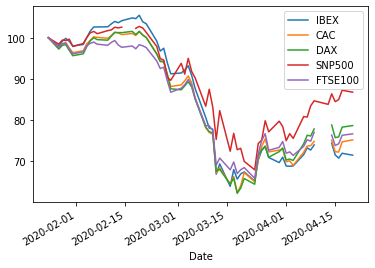

In [78]:
import yfinance as yf
import pandas as pd

# bbva_nyse = yf.Ticker("BBVA")
# bbva_bme = yf.Ticker("BBVA.MC")

# Get index data for the past 30 days. Rebase to 100 as the starting point. Then plot.

period = '60d'

def rebase(prices):
    return prices / prices[0] * 100

# Indexes for some of the countries we're interested in
ibex = yf.Ticker("^IBEX").history(period).apply(rebase)  # Spain; IBEX 35
cac = yf.Ticker("^FCHI").history(period).apply(rebase)  # France; CAC 40
# ftsemib = yf.Ticker("FTSEMIB.MI")  # Italy; FTSE MIB (Only last day data, no history!)
dax = yf.Ticker("^GDAXI").history(period).apply(rebase)  # Germany; DAX
snp = yf.Ticker("^GSPC").history(period).apply(rebase)  # US; SNP500
ftse100 = yf.Ticker("^FTSE").history(period).apply(rebase)  # US; SNP500


combo = pd.concat([ibex["Close"], cac["Close"], dax["Close"], snp["Close"], ftse100["Close"]], axis=1)
combo.columns = ['IBEX', 'CAC', 'DAX', 'SNP500', 'FTSE100']

plot = combo.plot()